# Figure Pieces

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import simulation functionality from neurodsp
from neurodsp.sim.transients import sim_action_potential
from neurodsp.sim.aperiodic import sim_powerlaw

from neurodsp.sim import set_random_seed
from neurodsp.plts import plot_time_series

In [3]:
from convnwb.plts.utils import check_ax
from convnwb.plts.timestamps import plot_alignment

from spiketools.plts.spikes import plot_waveform

In [4]:
import seaborn as sns
sns.set_context('talk')

In [5]:
set_random_seed(101)

## Action Potentials

In [6]:
# General simulation settings
fs = 5000
n_seconds = 2

In [7]:
# Simulate an action potential
spike = sim_action_potential(n_seconds=0.02, fs=fs,
                             centers=[0.35, 0.45, 0.6], stds=[0.075, 0.1, 0.15],
                             alphas=[-1, 0, 1], heights=[2.5, -5, 0.25])

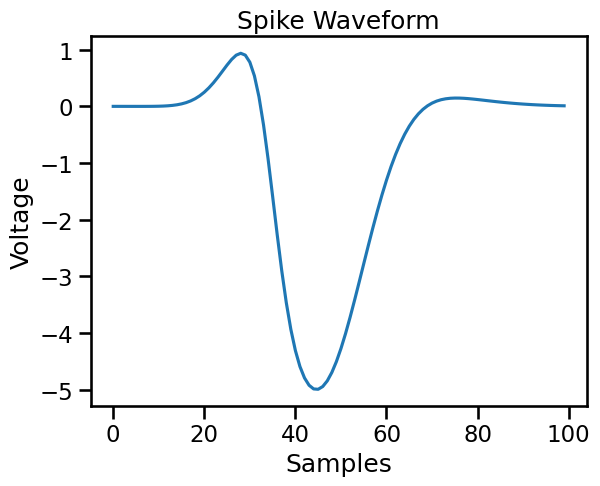

In [8]:
plot_waveform(spike)

In [9]:
# Simulate field
field = sim_powerlaw(n_seconds, fs, -1.25, (5, 750))

In [10]:
spike_inds = [100, 1000, 2500, 4250, 5500, 7500, 7700, 8750]
for ind in spike_inds:
    field[ind:ind+len(spike)] = spike

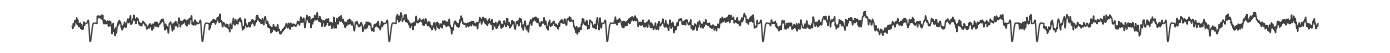

In [11]:
plot_time_series(None, field, alpha=0.75, lw=1, figsize=(15, 1.5))
ax = plt.gca()
ax.axis('off');
plt.savefig('neural_trace.pdf')

## Action Potential Comparisons

In [12]:
# Simulate an action potential
spike2 = sim_action_potential(n_seconds=0.02, fs=fs,
                              centers=[0.3, 0.41, 0.5], stds=[0.025, 0.05, 0.15],
                              alphas=[-1, -0.5, 1], heights=[1, -4, 0.45])

In [13]:
# Create example waveforms
n_aps = 25
waveforms = np.ones((n_aps, len(spike)))
for ind in range(n_aps):
    #waveforms[ind, :] = spike + np.random.rand(len(spike)) * 0.75
    waveforms[ind, :] = spike + (sim_powerlaw(len(spike)/fs, fs, -1) * 0.25)

In [14]:
# Create example waveforms
n_aps = 25
waveforms2 = np.ones((n_aps, len(spike)))
for ind in range(n_aps):
    #waveforms2[ind, :] = spike2 + np.random.rand(len(spike)) * 0.75
    waveforms2[ind, :] = spike2 + (sim_powerlaw(len(spike)/fs, fs, -1) * 0.25)

In [15]:
all_waveforms = np.vstack([waveforms, waveforms2])

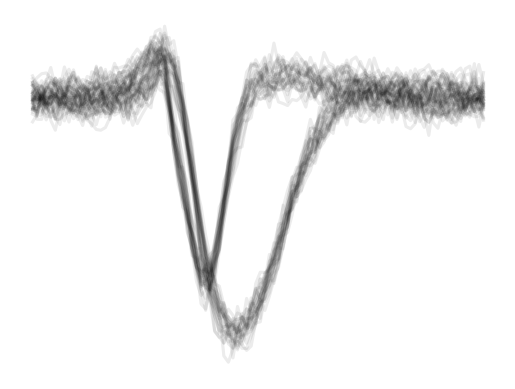

In [16]:
plot_waveform(all_waveforms, color='black', alpha=0.075, title='')
cax = plt.gca().axis('off');
plt.savefig('all_spikes.pdf')

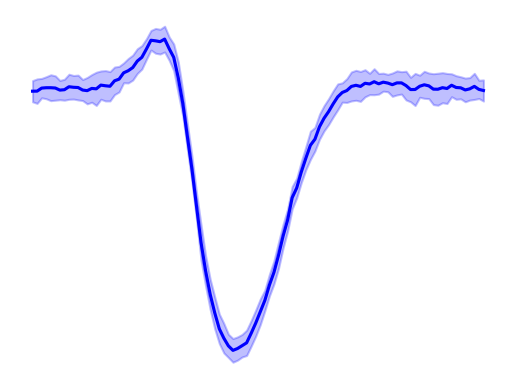

In [17]:
plot_waveform(waveforms, average='mean', shade='std', title='', color='blue')
cax = plt.gca().axis('off');
plt.savefig('spikes1.pdf')

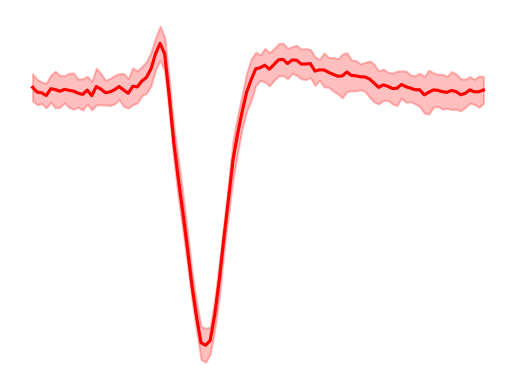

In [18]:
plot_waveform(waveforms2, average='mean', shade='std', title='', color='red')
cax = plt.gca().axis('off');
plt.savefig('spikes2.pdf')

## Sync Pulses

In [19]:
# Define aligned sync pulses
sync1 = [5, 15, 22, 37, 47, 54]
sync2 = np.copy(sync1)

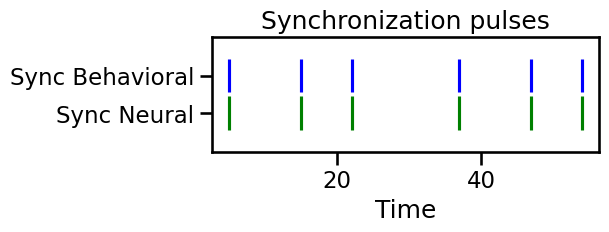

In [20]:
# Plot sync pulses
plot_alignment(sync1, sync2, xticklabels=[], figsize=(5, 1.5))

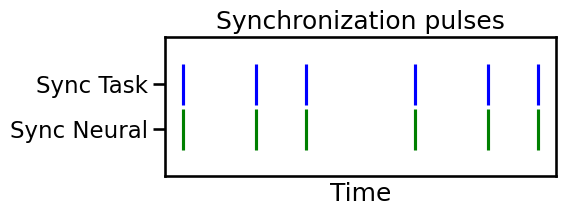

In [22]:
# Customized version of sync pulses
ax = check_ax(None, figsize=(6, 2.5))
ax.eventplot([sync1, sync2], linelengths=[0.9, 0.9], colors=['g', 'b'])
ax.set_xlabel('Time')
ax.set_xticks([])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Sync Neural', 'Sync Task'])
ax.set_title('Synchronization pulses')
plt.tight_layout()
plt.savefig('sync.pdf')